In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

open_file (generic function with 1 method)

In [2]:
rip_mono = open_file(string(res_path, "\\G-2021-03_lp_mono.jld2"));

rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_lp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_lp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_lp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_lp.jld2"));
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_lp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_lp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_lp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_lp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_lp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_lp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1 & refinement
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_lp.jld2"));
rip_monoK22 = open_file(string(res_path, "\\ripqp_mono_K22_lp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_lp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_lp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_lp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_r2 = open_file(string(res_path, "\\ripqp_mono_r2_lp.jld2")); # ref pd
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_lp.jld2")); 
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_multi_r3 = open_file(string(res_path, "\\ripqp_multi_r3_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd
rip_multi_r4 = open_file(string(res_path, "\\ripqp_multi_r4_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd


In [3]:
stats_lp = Dict(
#               :ripqp_mono        => rip_mono,
#               :ripqp_mono1       => rip_mono1,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
                # :ripqp_mono_c1   => rip_mono_c1,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
                :rip_monoK2      => rip_monoK2,
                :rip_monoK22      => rip_monoK22,
#                 :rip_mono_z      => rip_mono_z,
#                 :rip_mono_z2      => rip_mono_z2,
#                 :rip_mono_r      => rip_mono_r,
#                 :rip_mono_r2      => rip_mono_r2,
               )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_monoK22 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoK2  => 87×31 DataFrame. Omitted printing of 24 columns…

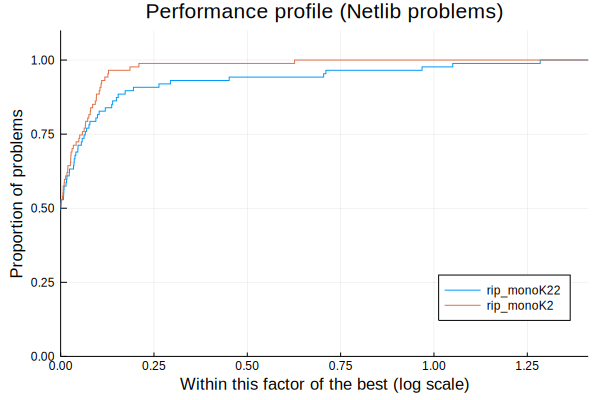

In [4]:
perf = performance_profile(stats_lp, df->df.elapsed_time)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [5]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1   => rip_mono1bis,
                :rip_monoosK251 => rip_monoosK251,
                :rip_monoosK252 => rip_monoosK252,
                )

Dict{Symbol,DataFrame} with 3 entries:
  :rip_monoosK251 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_monoosK252 => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_mono1      => 87×31 DataFrame. Omitted printing of 24 columns…

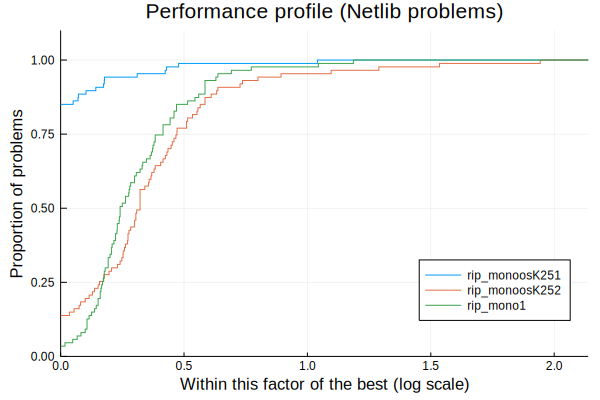

In [24]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [25]:
# stats multi
stats_lp = Dict(
#                 :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
#                 :rip_multi_r2      => rip_multi_r2,
#                 :rip_multi_r3      => rip_multi_r3,
#                 :rip_multi_r4      => rip_multi_r4,
               )

Dict{Symbol,DataFrame} with 2 entries:
  :rip_multi_r => 87×31 DataFrame. Omitted printing of 24 columns…
  :rip_multi_z => 87×31 DataFrame. Omitted printing of 24 columns…

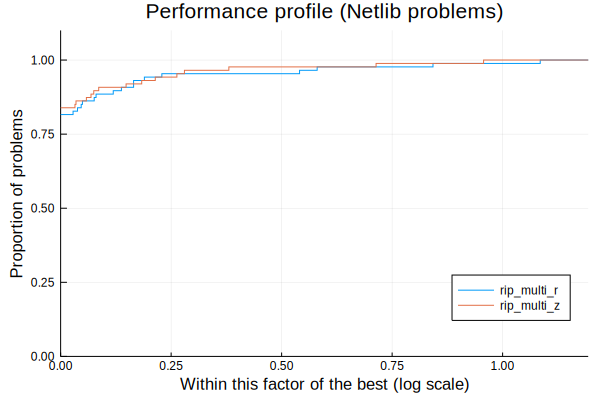

In [26]:
perf = performance_profile(stats_lp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

In [14]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_monoK22)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.240861,104,1.0554e-10,2.11891e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00196719,56,2.38192e-10,8.52076e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000836134,36,1.07704e-11,5.68434e-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0180981,84,1.84142e-8,2.23133e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0686011,88,7.80007e-7,1.5643e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.0665998,88,4.47035e-8,6.72883e-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.0209188,132,8.62685e-10,3.73461e-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.00863194,48,1.29814e-8,2.65814e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00182605,44,1.01189e-10,1.84386e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
